## 1. Build a Neural Network Model with specified parameters
Model Specifications:<br>
Input Layer:
Input shape: (30,) (Assume 30 input features).<br>
Hidden Layer 1:
Dense layer with 64 units.
Activation function: ReLU.<br>
Hidden Layer 2:
Dense layer with 32 units.
Activation function: ReLU. <br>
Output Layer:
For binary classification: Dense layer with 1 unit.
Activation function: sigmoid.
Loss Function:
Use binary crossentropy.
Optimizer:
Use Adam optimizer with a learning rate of 0.001.
Metrics:
Use accuracy as the evaluation metric.
Training:
Train the model for 20 epochs with a batch size of 32.
Use the train-test split to evaluate performance.

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [17]:
from tensorflow.keras.layers import Dense,Input

In [18]:
# Generate synthetic data for practice
X, y = make_classification(n_samples=1000, n_features=30, random_state=65)


In [19]:
X.shape

(1000, 30)

In [28]:
X[3]

array([-0.41094839,  0.66440879, -3.0364701 ,  0.38968427,  1.44814127,
        1.58830469, -2.58942867, -0.47008522, -0.2551616 ,  1.07194536,
       -0.306788  , -1.0191707 ,  0.37315144, -0.53741744, -1.61881688,
        0.11721556, -0.72100368,  0.36236659, -0.37334882,  0.22233618,
        0.28496471,  0.26527412, -0.63751437,  0.49137253, -0.61886248,
        0.8456609 ,  0.8976212 ,  0.58229284, -1.51967668, -0.0592569 ])

In [27]:
y[3]

0

In [30]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)


In [31]:
X_train

array([[-1.27277547e-01, -4.54306552e-01, -1.27877446e+00, ...,
        -1.79570429e-01,  1.13733328e+00, -4.68771426e-02],
       [ 2.11918769e+00,  1.03710234e+00, -7.64822851e-01, ...,
         6.12092734e-01, -1.07954765e+00, -1.61783953e+00],
       [ 5.33344981e-01,  2.71425406e+00,  6.06692410e-01, ...,
         1.60112550e-04, -7.61681698e-01,  5.67657849e-01],
       ...,
       [ 6.28464177e-01, -6.42493130e-01,  1.12801550e+00, ...,
         3.47169108e-01, -1.41392525e-02, -6.36971075e-01],
       [ 1.08030638e+00,  1.55338694e+00,  7.26136389e-01, ...,
         2.80082122e+00, -1.91313286e-01,  7.33802312e-01],
       [-4.13685817e-01,  9.52637160e-01, -3.50496281e-01, ...,
        -5.30856943e-01,  1.03154066e+00,  2.07524047e-01]])

In [ ]:

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
X_train

array([[-1.27277547e-01, -4.54306552e-01, -1.27877446e+00, ...,
        -1.79570429e-01,  1.13733328e+00, -4.68771426e-02],
       [ 2.11918769e+00,  1.03710234e+00, -7.64822851e-01, ...,
         6.12092734e-01, -1.07954765e+00, -1.61783953e+00],
       [ 5.33344981e-01,  2.71425406e+00,  6.06692410e-01, ...,
         1.60112550e-04, -7.61681698e-01,  5.67657849e-01],
       ...,
       [ 6.28464177e-01, -6.42493130e-01,  1.12801550e+00, ...,
         3.47169108e-01, -1.41392525e-02, -6.36971075e-01],
       [ 1.08030638e+00,  1.55338694e+00,  7.26136389e-01, ...,
         2.80082122e+00, -1.91313286e-01,  7.33802312e-01],
       [-4.13685817e-01,  9.52637160e-01, -3.50496281e-01, ...,
        -5.30856943e-01,  1.03154066e+00,  2.07524047e-01]])

In [12]:
X_train.shape

(800, 30)

In [15]:
y_train.shape

(800,)

In [13]:
X_train

array([[ 1.83615745, -1.78717512, -0.49080401, ...,  0.72001863,
        -0.87851766, -0.20712849],
       [ 0.02803661,  0.15792675,  0.64680757, ..., -1.77031579,
        -0.35241479, -0.24479517],
       [ 0.13889878,  0.06116234, -2.3076005 , ...,  1.67635338,
         0.32141272,  0.49574774],
       ...,
       [-0.47294523, -0.41649492, -0.75841813, ..., -1.02556396,
        -0.292911  , -2.16129384],
       [-2.22479822,  0.88860032,  1.04533831, ..., -0.97744283,
         0.40802585,  1.22189745],
       [-0.47066034, -1.56997459, -1.45008452, ...,  0.65563577,
        -0.76134121, -1.59300773]])

In [8]:
# Build the model
model = Sequential([
    Input(shape=(30,)),               # Input Layer
    Dense(units=64, activation='relu'),  # Hidden Layer 1
    Dense(units=32, activation='relu'),  # Hidden Layer 2
    Dense(units=1, activation='sigmoid')  # Output Layer
])


In [33]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [55]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9614 - loss: 0.1430 - val_accuracy: 0.8850 - val_loss: 0.3213
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9722 - loss: 0.1140 - val_accuracy: 0.8750 - val_loss: 0.3251
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9654 - loss: 0.1191 - val_accuracy: 0.8750 - val_loss: 0.3326
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9770 - loss: 0.1041 - val_accuracy: 0.8750 - val_loss: 0.3381
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9704 - loss: 0.1178 - val_accuracy: 0.8800 - val_loss: 0.3450
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9780 - loss: 0.0982 - val_accuracy: 0.8750 - val_loss: 0.3497
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9752 - loss: 0.1035 - val_accuracy: 0.8750 - val_loss: 0.3571
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0883 - val_accuracy: 0.8750 - val_loss:

In [56]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test accuracy: {test_acc}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8787 - loss: 0.3660 
Test accuracy: 0.875


In [59]:
print(history.history)


{'accuracy': [0.9637500047683716, 0.9662500023841858, 0.9674999713897705, 0.9725000262260437, 0.9750000238418579, 0.9762499928474426, 0.9837499856948853, 0.987500011920929, 0.9862499833106995, 0.9862499833106995, 0.9900000095367432, 0.9887499809265137, 0.9912499785423279, 0.9912499785423279, 0.9925000071525574], 'loss': [0.1339239776134491, 0.12518063187599182, 0.11780640482902527, 0.10911267250776291, 0.1026444211602211, 0.09592258185148239, 0.08873133361339569, 0.08223764598369598, 0.07653890550136566, 0.07161859422922134, 0.06654181331396103, 0.06133025512099266, 0.056607361882925034, 0.05176842585206032, 0.04845600947737694], 'val_accuracy': [0.8849999904632568, 0.875, 0.875, 0.875, 0.8799999952316284, 0.875, 0.875, 0.875, 0.875, 0.8799999952316284, 0.875, 0.875, 0.875, 0.875, 0.875], 'val_loss': [0.32129913568496704, 0.32514873147010803, 0.3325761556625366, 0.33814629912376404, 0.34502890706062317, 0.3496735095977783, 0.3571247160434723, 0.36346566677093506, 0.37452489137649536, 0

In [57]:
import matplotlib.pyplot as plt


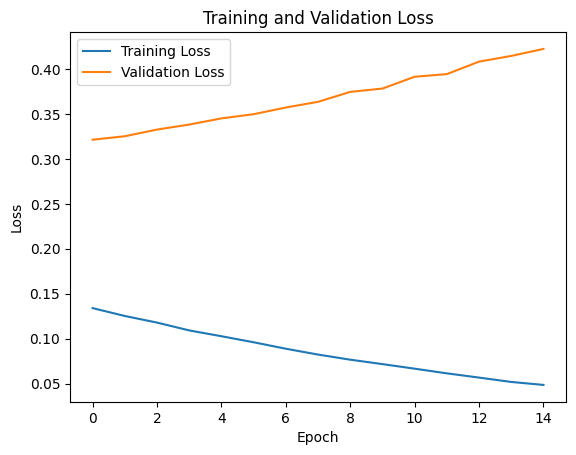

In [58]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [61]:
print(history.history['val_loss'])

[0.32129913568496704, 0.32514873147010803, 0.3325761556625366, 0.33814629912376404, 0.34502890706062317, 0.3496735095977783, 0.3571247160434723, 0.36346566677093506, 0.37452489137649536, 0.3781980872154236, 0.39134854078292847, 0.39429089426994324, 0.40820062160491943, 0.41452881693840027, 0.42231932282447815]
